# <div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">برچسب زنی اجزای متصل و پیوسته</div>

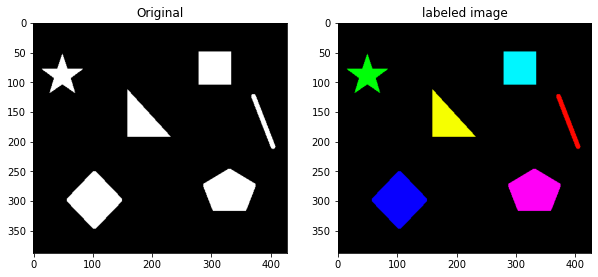

In [12]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

img = cv2.imread("images/shapes.png", 0)
_, img = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)
num_labels, labels = cv2.connectedComponents(img)

# Map component labels to hue val, 0-179 is the hue range in OpenCV
label_hue = np.uint8(179*labels/np.max(labels))
blank = np.ones_like(img) * 255
labeled_img = cv2.merge([label_hue, blank, blank])

# Converting cvt to BGR
labeled_img = cv2.cvtColor(labeled_img, cv2.COLOR_HSV2BGR)

# set bg label to black
labeled_img[label_hue==0] = 0


plt.figure(figsize=[10,8])
plt.subplot(121);plt.imshow(img, cmap='gray');plt.title("Original");
plt.subplot(122);plt.imshow(labeled_img, cmap='gray');plt.title("labeled image");

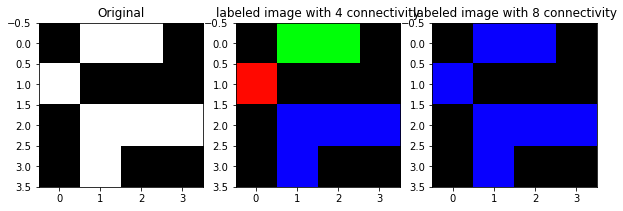

In [15]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

img = cv2.imread("images/small-connected-test.png", 0)
_, img = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)
_, labels_with_4_connectivity = cv2.connectedComponents(img, connectivity=4)
_, labels_with_8_connectivity = cv2.connectedComponents(img, connectivity=8)

label_hue4 = np.uint8(179*labels_with_4_connectivity/np.max(labels_with_4_connectivity))
label_hue8 = np.uint8(179*labels_with_8_connectivity/np.max(labels_with_8_connectivity))

blank = np.ones_like(img) * 255
labeled_img4 = cv2.merge([label_hue4, blank, blank])
labeled_img8 = cv2.merge([label_hue8, blank, blank])

# Converting cvt to BGR
labeled_img4 = cv2.cvtColor(labeled_img4, cv2.COLOR_HSV2BGR)
labeled_img8 = cv2.cvtColor(labeled_img8, cv2.COLOR_HSV2BGR)

# set bg label to black
labeled_img4[label_hue4==0] = 0
labeled_img8[label_hue8==0] = 0

plt.figure(figsize=[10,8])
plt.subplot(131);plt.imshow(img, cmap='gray');plt.title("Original");
plt.subplot(132);plt.imshow(labeled_img4, cmap='gray');plt.title("labeled image with 4 connectivity");
plt.subplot(133);plt.imshow(labeled_img8, cmap='gray');plt.title("labeled image with 8 connectivity");